In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import models,layers

In [3]:

from tensorflow.keras.datasets import mnist
import numpy as np
import random

In [4]:
import matplotlib.pyplot as plt

In [5]:
(x_train , y_train) , (x_test,y_test) = mnist.load_data()

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0

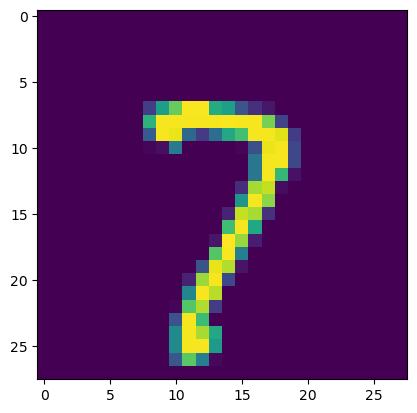

In [7]:
idx = random.randint(0 , len(x_train))
plt.imshow(x_train[idx , : ])
plt.show()

In [8]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [9]:
model = Sequential([
    Conv2D(32 , (3,3) , activation = 'relu' , input_shape=(28 , 28 ,1)),
    MaxPooling2D((2,2)),
    Conv2D(32 , (3,3) , activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64 , activation = 'relu'),
    Dense(10, activation = 'softmax'),
])

In [10]:
# Assuming x_train is currently of shape (num_samples, 28, 28)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))  # Add channel dimension
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [11]:
model.compile(optimizer = 'adam' , loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(x_train,y_train,epochs = 5 ,validation_data=(x_test , y_test))

Epoch 1/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1573 - accuracy: 0.9523 - val_loss: 0.0609 - val_accuracy: 0.9796
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0552 - accuracy: 0.9826 - val_loss: 0.0485 - val_accuracy: 0.9840
Epoch 3/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0384 - accuracy: 0.9878 - val_loss: 0.0355 - val_accuracy: 0.9888
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0295 - accuracy: 0.9905 - val_loss: 0.0349 - val_accuracy: 0.9886
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0276 - val_accuracy: 0.9905


In [13]:
model.evaluate(x_test , y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0276 - accuracy: 0.9905


[0.02757829613983631, 0.9904999732971191]

In [14]:
x_test.shape

(10000, 28, 28, 1)

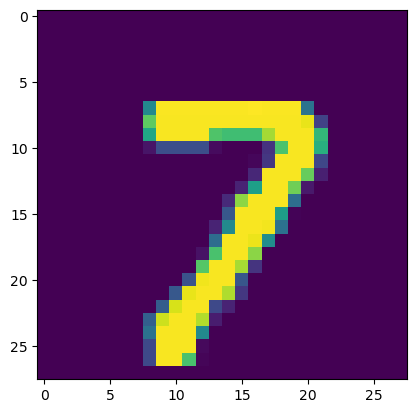

7


In [20]:
idx2 = random.randint(0, len(y_test))
plt.imshow(x_test[idx2 , :])
plt.show()
y_pred = model.predict(x_test[idx2].reshape(1, 28, 28, 1))
print(np.argmax(y_pred))